# Ejemplo Red Neuronal con sigmoide (regresión logística)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
class HighwaySimulator:
	"""This class keeps track of the state of the world and is able to sense it"""
	MAXCRASHES=1000
	def __init__(self,world,grafica=True):
		self.world=world
		self.positionY=0
		self.positionX=random.randint(1,len(world.columns)-2)
		self.trayectoriaX=[self.positionX]
		self.trayectoriaY=[self.positionY]
		self.crashes=0
		self.steps=0
		self.out=False
		self.graficar=grafica
		#graficar
		if grafica:
			l=[(j,world.ix[i,j]*i) for i in range(len(world.index)) for j in range(len(world.columns)) ]
			l=zip(*l)
			plt.scatter(l[0],l[1])
		
	#returns the values (for now noiseless of the Moore neighborhood) from left to right, top to bottom 
	def sensor(self):
		output=[]
		positionY=self.positionY
		positionX=self.positionX
		world=self.world
		if positionY==0:
			output= output + [1,1,1] #behind limit
		else:
			output=output + [df.ix[positionY-1,positionX-1],df.ix[positionY-1,positionX],df.ix[positionY-1,positionX+1] ] #behind
		output=output + [df.ix[positionY,positionX-1],df.ix[positionY,positionX],df.ix[positionY,positionX+1] ] #sides
		if positionY==len(world.index)-1: #front boundary
			output= output + [1,1,1]
		else:
			output=output + [df.ix[positionY+1,positionX-1],df.ix[positionY+1,positionX],df.ix[positionY+1,positionX+1] ] #front
		return output
		
	###Set an arbitrary position
	def setPosition(self,x,y):
		world=self.world
		if x<=1:
			self.positionX=1
		else:
			if x >= len(world.columns) -2:
				self.positionX=len(world.columns) -2
			else:
				self.positionX=x
		
		if y<=0:
			self.positionY=0
		else:
			if y >= len(world.index) -1:
				self.positionY=len(world.index) -1
			else:
				self.positionY=y
	
	def checkPosition(self,x,y):
		world=self.world
		if x<1:
			return 0
		
		if x > len(world.columns) -2:
			return 0
				
		if y<0:
			return 1
		
		if y >= len(world.index) -1:
			return 2
		if world.ix[y,x]==0:
			return 3
		else:
			return 0
	###Move
	def move(self,m):
		if self.out:
			print "You are already out"
			return
		if self.crashes >= self.MAXCRASHES:
			print "Too many accidents!!!!"
			return
		if m=='F':
			res=self.checkPosition(self.positionX,self.positionY+1)
			if res==3:
				self.positionY=self.positionY+1
			elif res==2:
				print 'You are out, congratulations!!'
				self.out=True
			else:
				print "Crash"
				self.crashes=self.crashes+1
		if m=='B':
			res=self.checkPosition(self.positionX,self.positionY-1)
			if res==3:
				self.positionY=self.positionY-1
			else:
				print "Crash"
				self.crashes=self.crashes+1
		if m=='R':
			res=self.checkPosition(self.positionX+1,self.positionY)
			if res==3:
				self.positionX=self.positionX+1
			else:
				print "Crash"
				self.crashes=self.crashes+1
		if m=='L':
			res=self.checkPosition(self.positionX-1,self.positionY)
			if res==3:
				self.positionX=self.positionX-1
			else:
				print "Crash"
				self.crashes=self.crashes+1	
		if res ==3 and self.graficar:
			self.trayectoriaX=self.trayectoriaX+[self.positionX]
			self.trayectoriaY=self.trayectoriaY+[self.positionY]
			plt.plot(self.trayectoriaX,self.trayectoriaY,color='red')
		
		self.steps=self.steps+1	


In [3]:
X=np.asarray([
[-1,-1,-1,1,-1,-1,-1,-1,1],
[1,-1,-1,-1,-1,1,-1,1,-1],
[1,1,-1,-1,-1,-1,1,-1,1],
[-1,-1,-1,1,-1,1,-1,-1,-1],
[1,-1,1,-1,-1,-1,1,1,-1],
[-1,1,-1,-1,-1,-1,1,-1,1],
[-1,-1,-1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,1,1,1],
[1,1,-1,-1,-1,-1,-1,1,1],
[1,1,1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,-1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,-1,-1],
[-1,-1,1,-1,-1,-1,1,-1,1],
[-1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,1,-1],
[-1,1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,1,-1],
[-1,1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,1,-1],
[-1,1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,1,-1],
[-1,1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,1,-1],
[-1,1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,-1,-1,1],
[1,-1,1,-1,-1,1,-1,1,1],
[1,1,-1,1,-1,-1,1,-1,1],
[1,-1,-1,1,-1,1,1,-1,-1],
[1,-1,1,1,-1,-1,1,-1,-1],
[1,-1,-1,1,-1,-1,1,1,-1],
[-1,-1,1,-1,-1,1,1,-1,1],
[-1,-1,1,1,-1,1,1,-1,1]
    ])

Y=np.asarray([
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1],
[-1,-1],
[-1,1],
[-1,-1],
[-1,-1]])

# Declaracion de variables

In [4]:
#Los placeholders son para los datos de entrada
x_ = tf.placeholder(tf.float32, [None, 9])
y_ = tf.placeholder(tf.float32, [None, 2]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino

# Capa oculta
# W_layerx son los pesos para la capa x
W_layer1=tf.Variable(tf.random_uniform([9,2], -1, 1), name="W_layer1")
# b_layerx son las w0's - independientes. Genera un vector de 0 en este caso 4 neuronas
b_layer1 = tf.Variable(tf.zeros([2]), name="b_layer1")

# Capa de salida
W_layer2=tf.Variable(tf.random_uniform([2,2], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([2]), name="b_layer2")


# Operaciones, grafo

In [5]:
# Aplicamos la funcion de ajuste de x*w
# H es una matriz 9 por 4
H = tf.nn.tanh(tf.matmul(x_,W_layer1)+b_layer1)

# y es una matriz 4 por 2
y = tf.nn.tanh(tf.matmul(H,W_layer2)+b_layer2)

# Funcion de pérdida - error
loss = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 

# Aprende minimizando la funciòn de perdida
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)



# Inicializo la red

In [6]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


# Ejecuto el aprendizaje

In [7]:
sess.run(init)
for i in range(100):
     sess.run(train_step, feed_dict={x_: X, y_: Y })

    

In [8]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x_: X, y_: Y}))
print(sess.run(W_layer2, feed_dict={x_: X, y_: Y}))

[[-0.9863165  -0.99481529]
 [-0.90292943  0.94126064]
 [-0.99306107 -0.98981184]
 [-0.96433979 -0.99820781]
 [ 0.82512182 -0.82239407]
 [-0.9652065  -0.99830067]
 [-0.99809748 -0.95744348]
 [-0.95128101  0.8924185 ]
 [-0.96324599  0.93688267]
 [-0.97621959 -0.99736696]
 [-0.96490979 -0.99827456]
 [-0.95148838 -0.99805033]
 [ 0.78637695 -0.85652119]
 [-0.97294581 -0.99774647]
 [-0.99489516 -0.98426014]
 [-0.99014598 -0.95596361]
 [-0.96368974 -0.9983328 ]
 [-0.96292859 -0.99840963]
 [ 0.84206754 -0.84267765]
 [-0.9681899  -0.99812084]
 [-0.99489516 -0.98426014]
 [-0.93078929  0.96090537]
 [-0.98358119 -0.99606729]
 [-0.96490979 -0.99827456]
 [-0.95148838 -0.99805033]
 [ 0.78637695 -0.85652119]
 [-0.96852618 -0.9980858 ]
 [-0.99489516 -0.98426014]
 [-0.93078929  0.96090537]
 [-0.98358119 -0.99606729]
 [-0.96490979 -0.99827456]
 [ 0.84206754 -0.84267765]
 [-0.9681899  -0.99812084]
 [-0.99489516 -0.98426014]
 [-0.93078929  0.96090537]
 [-0.98358119 -0.99606729]
 [-0.96490979 -0.99827456]
 

# Cuantificar Error

In [9]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x_: X, y_: Y})) # las corremos

0.988889


# Sigmoidal
## 0.988889 4 neuronas
## 0.988889 3 neuronas
## 0.988889 2 neuronas

# Tangente Hiperbólica
## 0.988889 4 neuronas
## 0.988889 3 neuronas
## 0.988889 2 neuronas

In [10]:
dia = csv.excel()
df = pd.read_csv("carretera4.csv")

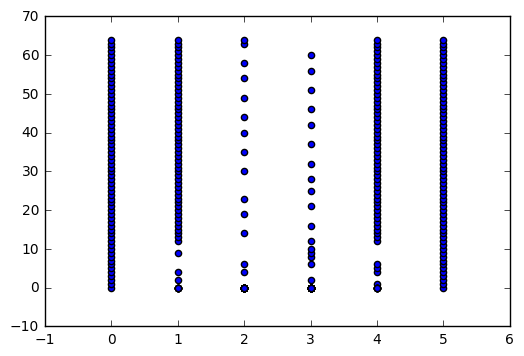

In [11]:
carre=HighwaySimulator(df)

In [15]:
for i in range(100):
    val=sess.run(y,feed_dict={x_:[carre.sensor()]})[0]
    print(val)
    
    #carre.move(salida(val))
    
    #sess.run(train_step, feed_dict={x_: X, y_: Y })

[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958  0.31350213]
[-0.99784958